In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [ ]:
inter = pd.read_csv('interactiondata.csv')
order = pd.read_csv('orderdata.csv')
user = pd.read_csv('userdata.csv')

#ПРЕДОБРАБОТКА

In [ ]:
inter.columns = inter.columns.str.lower().str.replace(' ', '_')
order.columns = order.columns.str.lower().str.replace(' ', '_')
user.columns = user.columns.str.lower().str.replace(' ', '_')

In [ ]:
inter.sample(7)

,userid,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
402,4bcff3de-ec18-495d-81be-1f49be15c689,2,2024-07-06,2,0,0,2,6,4,20,0,1,0,1,0
3008,f93cd686-5b76-4a64-9aa0-79874f29b05c,2,2024-07-08,12,1,4,2,17,34,78,0,0,0,1,1
250,5c258b0c-382e-403f-8fa3-3a0fed36292c,2,2024-06-14,1,3,12,6,4,1,1,0,0,0,0,0
1740,a982b6ae-3087-446e-adaf-5f89f86f80a9,1,2024-06-28,2,3,13,7,8,12,22,0,0,0,0,0
2926,385172dc-e929-4b78-b459-ccc3fe90dd45,2,2024-05-15,5,0,0,2,8,4,34,0,0,0,1,0
3320,ca59606d-9079-4d80-8e36-e1068b51d9c3,0,2024-07-04,4,0,1,0,0,1,26,0,0,1,1,0
65,d9c6874c-272c-47ce-b042-a3d3dd8350a5,1,2024-06-01,4,0,1,1,5,4,43,1,1,0,0,1


In [ ]:
order.sample(7)

,userid,category,avg_bill
23213,689604ce-fcda-4f70-909b-aaf31e31dcda,sweets,153.0
15050,fc9fe3fc-0044-4b73-aacd-6af332f8698d,vegetables,1293.0
5834,40673513-fd53-4618-ab2a-495fb628587c,other,1370.0
11087,31d0093f-b232-4766-aeb1-647ad1f2a049,fruits,405.0
11212,acdef9ad-9b5c-40af-b405-951e1db47fb0,vegetables,1524.0
19444,b414486a-31ee-4ee3-8a0b-235b25c00a7b,meat,108.0
12916,a883c6b4-c0fb-4b68-931e-f83197334085,sweets,168.0


In [ ]:
user.sample(10)

,userid,join_datetime,age,income,kids,teenagers,marital,education
1459,491f954d-976f-451c-b0eb-4ea426a7129c,2023-09-22 14:10:37,52,79949.0,0,1,single,bachelor
2273,99e1df20-a917-45bf-a5bd-c679ce15599a,2023-05-15 23:18:22,15,26261.0,0,0,single,basic
388,223b00c2-444b-442f-a7fe-38bd19b4a709,2023-10-10 12:50:08,11,26623.0,0,0,single,bachelor
428,b0ec59da-beb4-4d6b-9c7d-28433a647af9,2024-03-16 07:52:31,74,93569.0,0,0,married,masters
1035,f7856f37-59ef-46a0-bd96-c941c05f4568,2023-10-15 21:29:39,64,89520.0,0,1,married,bachelor
2069,b74dc8c9-e3f7-446f-a0ca-2c60c5c6c724,2024-02-18 02:35:22,57,59213.0,1,1,widow,bachelor
2985,c50218a5-5725-4265-8a01-ada812f48861,2023-09-29 14:34:55,11,26314.0,0,0,single,masters
3037,93b4d156-4832-4e3b-b40b-b469dbc46a05,2023-09-24 02:31:10,16,26604.0,0,0,single,bachelor
837,7295d364-38a6-4615-94fc-0dd86a9ba9c5,2023-08-14 10:04:01,15,26829.0,0,0,single,masters
1453,a8b8fd0e-e0cb-450e-b4eb-04b57c10dc68,2023-09-06 17:52:46,35,65101.0,1,0,dating,masters


In [ ]:
order['category'].unique()

array(['fish', 'other', 'sweets', 'fruits', 'alcohol', 'meat',
       'vegetables'], dtype=object)

#inter

In [ ]:
inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   userid                         3405 non-null   object
 1   complain_count                 3405 non-null   int64 
 2   last_order_dt                  3341 non-null   object
 3   discount_purchases_count_avg   3405 non-null   int64 
 4   catalogue_purchases_count_avg  3405 non-null   int64 
 5   store_purchases_count_avg      3405 non-null   int64 
 6   website_purchases_count_avg    3405 non-null   int64 
 7   website_visit_count_avg        3405 non-null   int64 
 8   mobile_purchases_count_avg     3405 non-null   int64 
 9   mobile_visit_count_avg         3405 non-null   int64 
 10  marketing_company_outcome_1    3405 non-null   int64 
 11  marketing_company_outcome_2    3405 non-null   int64 
 12  marketing_company_outcome_3    3405 non-null   int64 
 13  mar

In [ ]:
inter.describe()

,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
count,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000
mean,0.579736,3.810866,2.064023,4.537739,3.281057,5.902203,11.004405,27.441703,0.216740,0.188253,0.230543,0.214097,0.224670
std,0.825134,5.197684,2.672049,3.327696,2.876013,3.705144,12.015278,26.555485,0.412085,0.390971,0.421242,0.410255,0.417426
min,0.000000,0.000000,-1.000000,0.000000,-3.000000,0.000000,-2.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,4.000000,2.000000,6.000000,8.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,4.000000,6.000000,5.000000,8.000000,16.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,29.000000,28.000000,13.000000,27.000000,20.000000,59.000000,119.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
inter.isna().sum()

userid                            0
complain_count                    0
last_order_dt                    64
discount_purchases_count_avg      0
catalogue_purchases_count_avg     0
store_purchases_count_avg         0
website_purchases_count_avg       0
website_visit_count_avg           0
mobile_purchases_count_avg        0
mobile_visit_count_avg            0
marketing_company_outcome_1       0
marketing_company_outcome_2       0
marketing_company_outcome_3       0
marketing_company_outcome_4       0
marketing_company_outcome_5       0
dtype: int64

1. пропуски в дате
2. отрицательные значения  catalogue_purchases_count_avg, website_purchases_count_avg, mobile_purchases_count_avg, mobile_visit_count_avg
3. формат даты не тот






In [ ]:
# приводим в формат даты
inter['last_order_dt'] = pd.to_datetime(inter['last_order_dt'], format='%Y-%m-%d')


In [ ]:
len(inter.loc[inter['catalogue_purchases_count_avg'] < 0])

41

In [ ]:
len(inter.loc[inter['website_purchases_count_avg'] < 0])

81

In [ ]:
len(inter.loc[inter['mobile_purchases_count_avg'] < 0])

177

In [ ]:
len(inter.loc[inter['mobile_visit_count_avg'] < 0])

177

In [ ]:
# удаляем отрицательные значения и пропуски в дате
clear_inter = inter.loc[(inter['mobile_visit_count_avg'] >= 0) & (inter['mobile_purchases_count_avg'] >= 0) & (inter['website_purchases_count_avg'] >= 0) & (inter['catalogue_purchases_count_avg'] >= 0) & ((inter['last_order_dt'] >= pd.to_datetime('01.01.2000', format='%d.%m.%Y')))]

In [ ]:
# inter.loc[~(inter['last_order_dt'] >= pd.to_datetime('01.01.2000', format='%d.%m.%Y'))]

In [ ]:
clear_inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3057 entries, 0 to 3404
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   userid                         3057 non-null   object        
 1   complain_count                 3057 non-null   int64         
 2   last_order_dt                  3057 non-null   datetime64[ns]
 3   discount_purchases_count_avg   3057 non-null   int64         
 4   catalogue_purchases_count_avg  3057 non-null   int64         
 5   store_purchases_count_avg      3057 non-null   int64         
 6   website_purchases_count_avg    3057 non-null   int64         
 7   website_visit_count_avg        3057 non-null   int64         
 8   mobile_purchases_count_avg     3057 non-null   int64         
 9   mobile_visit_count_avg         3057 non-null   int64         
 10  marketing_company_outcome_1    3057 non-null   int64         
 11  marketing_company_outc

In [ ]:
# sns.countplot(inter['mobile_purchases_count_avg'], orient='h', stat="percent")

# order

In [ ]:
order.head(10 )

,userid,category,avg_bill
0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0
2,99792dfd-8c62-4903-92b2-a83dfd392cb1,sweets,233.0
3,ad50b3da-da8d-4b35-92c3-79cf83c2250a,fish,594.0
4,a300c8a3-6280-4a59-8c89-be4212a4eb26,fruits,0.0
5,0ceeb59c-a91c-4cf4-8bf8-3593f12722b9,alcohol,602.0
6,b2a565e5-c3e2-4547-b075-d4ddedcc5506,alcohol,564.0
7,32fe3522-090a-4faa-b265-bc763142f0f5,meat,468.0
8,203e70de-1092-4cac-9234-9c68224a3185,sweets,55.0
9,df7140d3-27e9-43b2-8ed4-f5d3210eb636,fruits,795.0


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23835 entries, 0 to 23834
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userid    23835 non-null  object 
 1   category  23835 non-null  object 
 2   avg_bill  22814 non-null  float64
dtypes: float64(1), object(2)
memory usage: 558.8+ KB


In [ ]:
order.describe()

,avg_bill
count,22814.000000
mean,506.814105
std,629.378754
min,-283.000000
25%,45.000000
50%,248.000000
75%,794.000000
max,3612.000000


In [ ]:
order['category'].unique()

array(['fish', 'other', 'sweets', 'fruits', 'alcohol', 'meat',
       'vegetables'], dtype=object)

1. есть пропуски в avg_bill
2. отрицательные значения в avg_bill


In [ ]:
# удаляем некорректные значения
clear_order = order.loc[(order['avg_bill'] >= 0) & (~order['avg_bill'].isna())]
clear_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21691 entries, 0 to 23834
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userid    21691 non-null  object 
 1   category  21691 non-null  object 
 2   avg_bill  21691 non-null  float64
dtypes: float64(1), object(2)
memory usage: 677.8+ KB


#user

In [ ]:
user.sample(10)

,userid,join_datetime,age,income,kids,teenagers,marital,education
419,9ed92404-2e17-417b-a3b9-06934dab51ab,2024-02-14 18:06:21,36,61108.0,1,0,single,bachelor
2753,456ef3f9-7514-43af-a1f1-60cd6ea8c72b,2022-12-07 03:47:24,53,47574.0,2,1,married,bachelor
274,9e9fbce9-06ad-40ce-912e-f7e5ada7b683,2023-12-17 18:41:53,66,74344.0,0,1,dating,bachelor
1572,e489b336-1a97-41be-bdcb-ed38517c45f3,2024-03-02 05:17:53,58,76570.0,0,1,married,phd
125,3b4e6ec5-b488-4707-90d7-d44dc410bc76,2023-01-17 10:49:18,50,107053.0,1,0,single,bachelor
2434,f093cc5e-8ba6-454e-b956-132b334c8e30,2023-01-04 01:58:23,12,25635.0,0,0,single,masters
1233,39b1ba9e-a2a4-4c3b-862a-f891c8c9f1de,2022-06-08 22:15:55,41,108217.0,0,1,dating,bachelor
762,8cd13203-197f-4bdc-a230-26b3b2e71b61,2022-12-23 02:02:20,49,55538.0,1,0,dating,masters
3092,f3f78e4c-3834-4f91-864b-d5ca9bae00f2,2022-07-19 19:43:58,11,26790.0,0,0,single,masters
1237,fd2e290c-5360-48ac-ad4d-7d5fe4cadabf,2022-05-13 11:17:26,18,26179.0,0,0,single,bachelor


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         3405 non-null   object 
 1   join_datetime  3405 non-null   object 
 2   age            3405 non-null   int64  
 3   income         3405 non-null   float64
 4   kids           3405 non-null   int64  
 5   teenagers      3405 non-null   int64  
 6   marital        3405 non-null   object 
 7   education      3109 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 212.9+ KB


In [ ]:
user.describe()

,age,income,kids,teenagers
count,3405.000000,3405.000000,3405.000000,3405.000000
mean,38.973275,65902.699266,0.291336,0.328047
std,19.069070,32120.294552,0.483267,0.500461
min,11.000000,25500.000000,0.000000,0.000000
25%,19.000000,39918.000000,0.000000,0.000000
50%,42.000000,66020.000000,0.000000,0.000000
75%,54.000000,84322.000000,1.000000,1.000000
max,80.000000,279029.000000,2.000000,2.000000


In [ ]:
# приводим формат даты
user['join_datetime'] = pd.to_datetime(user['join_datetime'], format='%Y-%m-%d %H:%M:%S')

впринципе норм, но есть люди без образования

In [ ]:
# clear_inter.to_csv('inter.csv')
# clear_order.to_csv('order.csv')
# user.to_csv('user.csv')

# ПРЕДАНАЛИЗ

In [ ]:
# посмотрим на крайние даты покупок

print('the oldest purchase', min(clear_inter['last_order_dt']))
print('the newest purchase', max(clear_inter['last_order_dt']))

the oldest purchase 2024-05-11 00:00:00
the newest purchase 2024-07-09 00:00:00


In [ ]:
# хочется понять, почему люди перестал покупать товары
# для этого выделим пользователей, которые были активны последний раз в течении 4 недель от крайних дат (по 29 дней ,чтобы задействовать все записи)

active_users = clear_inter.loc[clear_inter['last_order_dt'] >= max(clear_inter['last_order_dt']) - timedelta(days=29), 'userid'].unique().tolist()
passive_users = clear_inter.loc[clear_inter['last_order_dt'] <= min(clear_inter['last_order_dt']) + timedelta(days=29), 'userid'].unique().tolist()

print('the number of active users', len(active_users))
print('the number of paccive users', len(passive_users))

the number of active users 2257
the number of paccive users 800


In [ ]:
active_mask = clear_inter['userid'].isin(active_users).reindex(inter.index).fillna(False)
passive_mask = clear_inter['userid'].isin(passive_users).reindex(inter.index).fillna(False)

active_inter = inter.loc[active_mask]
passive_inter = inter.loc[passive_mask]


active_mask = clear_order['userid'].isin(active_users).reindex(order.index).fillna(False)
passive_mask = clear_order['userid'].isin(passive_users).reindex(order.index).fillna(False)

active_order = clear_order.loc[active_mask]
passive_order = clear_order.loc[passive_mask]


active_mask = user['userid'].isin(active_users).reindex(user.index).fillna(False)
passive_mask = user['userid'].isin(passive_users).reindex(user.index).fillna(False)

active_user = user.loc[active_mask]
passive_user = user.loc[passive_mask]

In [ ]:
active_user.head(10)

,userid,join_datetime,age,income,kids,teenagers,marital,education
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters
2,d4810416-7e2a-4d1b-8440-30f39cd42aca,2022-11-14 12:31:05,13,25508.0,0,0,single,NaN
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters
5,607a82ac-14b3-45db-85c1-e0d668b1793a,2024-05-13 20:35:20,58,70183.0,0,0,single,masters
6,8a1e5952-c903-4b0c-a014-6f8d343ff101,2024-01-25 04:54:21,22,79870.0,0,0,single,bachelor
7,1cda23eb-4778-401c-a914-d0bdbba0013c,2023-05-18 11:35:35,17,25966.0,0,0,single,NaN
8,985a4133-a3b9-48e8-8989-a2c5906539be,2024-01-14 12:42:46,44,95755.0,0,1,married,phd
9,14c50c40-d3d5-40e4-9f62-a190b7a50df3,2022-10-10 21:48:39,63,51091.0,1,1,dating,bachelor
13,9bfe3ba4-f1e3-4ae3-b6fb-91b00ca67ab4,2023-03-30 23:40:02,44,74681.0,0,2,married,masters
14,05ba043f-4778-4c2f-9862-c40b84b484b6,2023-01-15 09:39:39,48,49762.0,1,0,single,bachelor


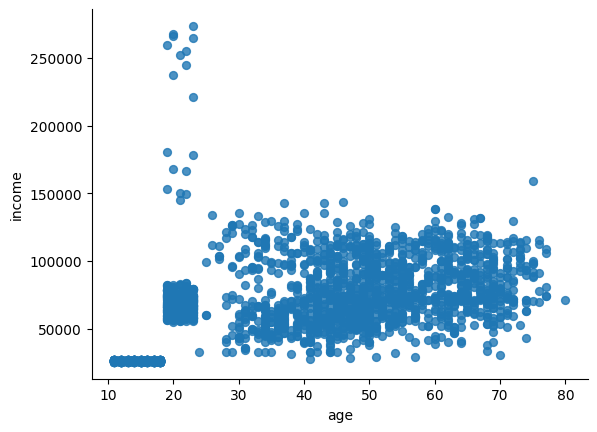

In [ ]:
# @title age vs income

from matplotlib import pyplot as plt
active_user.plot(kind='scatter', x='age', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

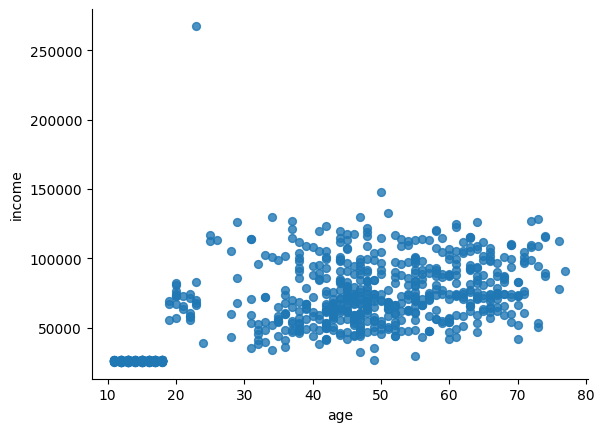

In [ ]:
passive_user.plot(kind='scatter', x='age', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

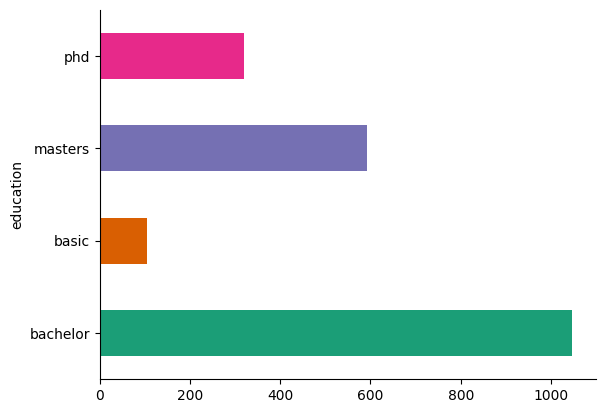

In [ ]:
# @title education

from matplotlib import pyplot as plt
import seaborn as sns
active_user.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

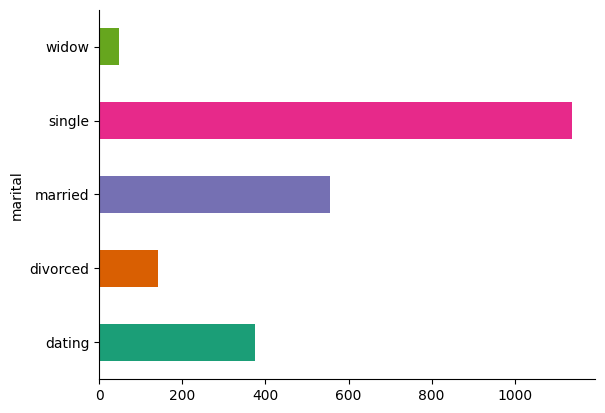

In [ ]:
# @title marital

from matplotlib import pyplot as plt
import seaborn as sns
active_user.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

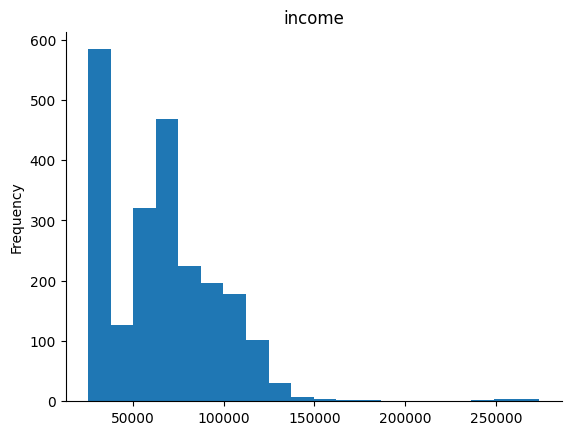

In [ ]:
# @title income

from matplotlib import pyplot as plt
active_user['income'].plot(kind='hist', bins=20, title='income')
plt.gca().spines[['top', 'right',]].set_visible(False)

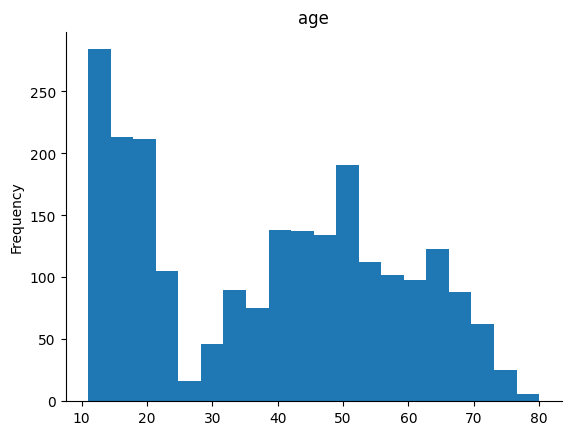

In [ ]:
# @title age

from matplotlib import pyplot as plt
active_user['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_active = pd.merge(active_inter, active_user, on='userid', how='inner')

merged_active = merged_active.drop(columns=['marketing_company_outcome_3', 'marketing_company_outcome_1', 'marketing_company_outcome_2', 'marketing_company_outcome_4', 'marketing_company_outcome_5'])


merged_passive = pd.merge(passive_inter, passive_user, on='userid', how='inner')

merged_passive = merged_passive.drop(columns=['marketing_company_outcome_3', 'marketing_company_outcome_1', 'marketing_company_outcome_2', 'marketing_company_outcome_4', 'marketing_company_outcome_5'])

In [ ]:
merged_active.head(10)

,userid,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,join_datetime,age,income,kids,teenagers,marital,education
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,2023-07-04 21:54:35,66,64898.0,0,1,dating,bachelor
1,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,2024-01-21 05:56:36,16,25793.0,0,0,single,basic
2,02448415-4639-4db9-a5f2-796e85fafc8e,2,2024-06-27,1,0,0,0,4,2,33,2022-09-04 17:55:26,14,26559.0,0,0,single,masters
3,be576e3b-7412-49fe-bf2c-da7223a33606,0,2024-07-05,1,5,3,4,19,48,75,2024-01-27 17:32:45,21,76755.0,0,0,single,bachelor
4,51065df7-a72d-4e01-810c-d930909ca382,0,2024-06-29,2,10,5,7,6,11,20,2022-12-04 22:05:30,77,73948.0,0,0,divorced,phd
5,0b8cd65c-840c-4c22-85f7-ae6ff3f4d183,1,2024-06-27,2,1,8,8,6,20,36,2022-09-16 21:07:57,53,110804.0,1,1,single,bachelor
6,6a78a8df-3261-46c7-8875-7b471ac29b4b,1,2024-06-15,1,3,6,4,1,16,29,2024-05-13 03:01:04,51,111627.0,0,0,married,masters
7,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,0,2024-07-03,3,1,3,4,7,20,36,2022-07-02 19:00:04,52,71801.0,1,1,married,bachelor
8,8f0f3d72-3ab3-4fcf-98b9-11709dd07ee5,2,2024-07-09,1,1,6,1,2,13,23,2024-02-23 17:01:54,43,77525.0,0,1,dating,bachelor
9,747e4ba4-de36-4e9a-8d0f-3a71f21711dc,0,2024-07-06,3,0,1,0,0,5,48,2024-04-12 22:42:00,15,25660.0,0,0,single,basic


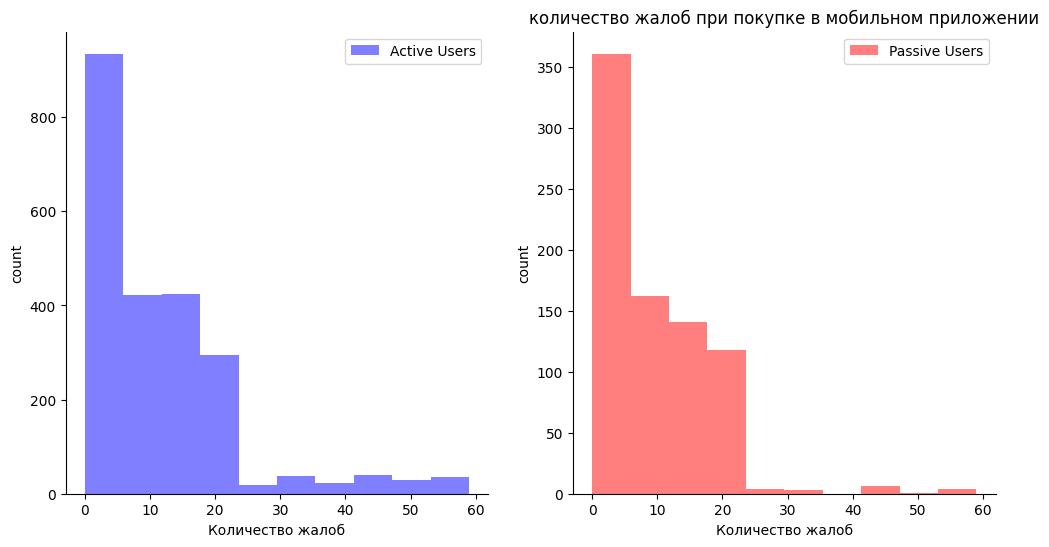

In [ ]:
# Создаем фигуру с 1 строкой и 2 столбцами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы для merged_active
merged_active.plot(kind='hist', x='complain_count', y='mobile_purchases_count_avg', ax=ax1, color='blue', alpha=0.5, label='Active Users')
ax1.set_xlabel('Количество жалоб')
ax1.set_ylabel('count')
ax1.spines[['top', 'right']].set_visible(False)

# Построение гистограммы для merged_passive
merged_passive.plot(kind='hist', x='complain_count', y='mobile_purchases_count_avg', ax=ax2, color='red', alpha=0.5, label='Passive Users')
ax2.set_xlabel('Количество жалоб')
ax2.set_ylabel('count')
ax2.spines[['top', 'right']].set_visible(False)

plt.title('количество жалоб при покупке в мобильном приложении')
plt.show()

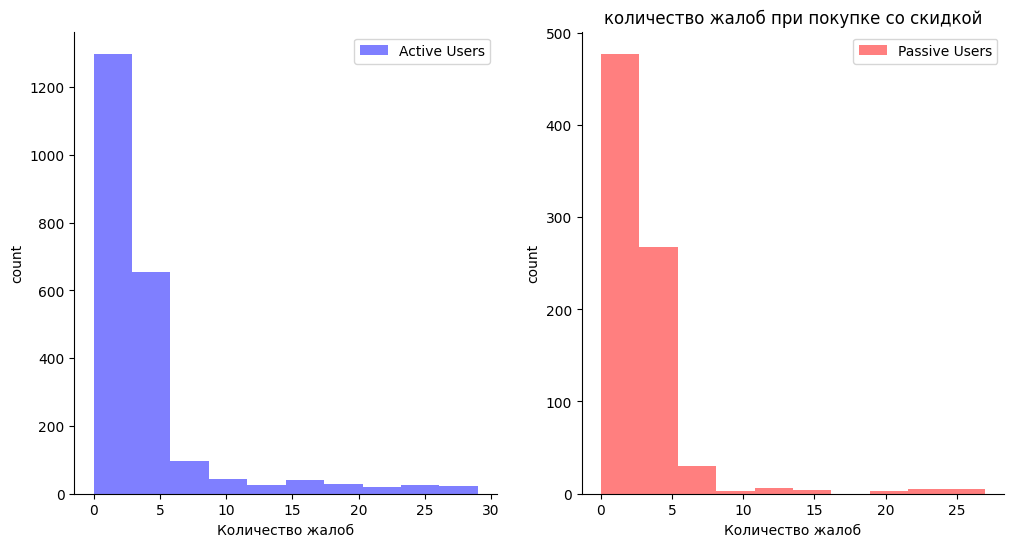

In [ ]:
# Создаем фигуру с 1 строкой и 2 столбцами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы для merged_active
merged_active.plot(kind='hist', x='complain_count', y='discount_purchases_count_avg', ax=ax1, color='blue', alpha=0.5, label='Active Users')
ax1.set_xlabel('Количество жалоб')
ax1.set_ylabel('count')
ax1.spines[['top', 'right']].set_visible(False)

# Построение гистограммы для merged_passive
merged_passive.plot(kind='hist', x='complain_count', y='discount_purchases_count_avg', ax=ax2, color='red', alpha=0.5, label='Passive Users')
ax2.set_xlabel('Количество жалоб')
ax2.set_ylabel('count')
ax2.spines[['top', 'right']].set_visible(False)

plt.title('количество жалоб при покупке со скидкой')
plt.show()

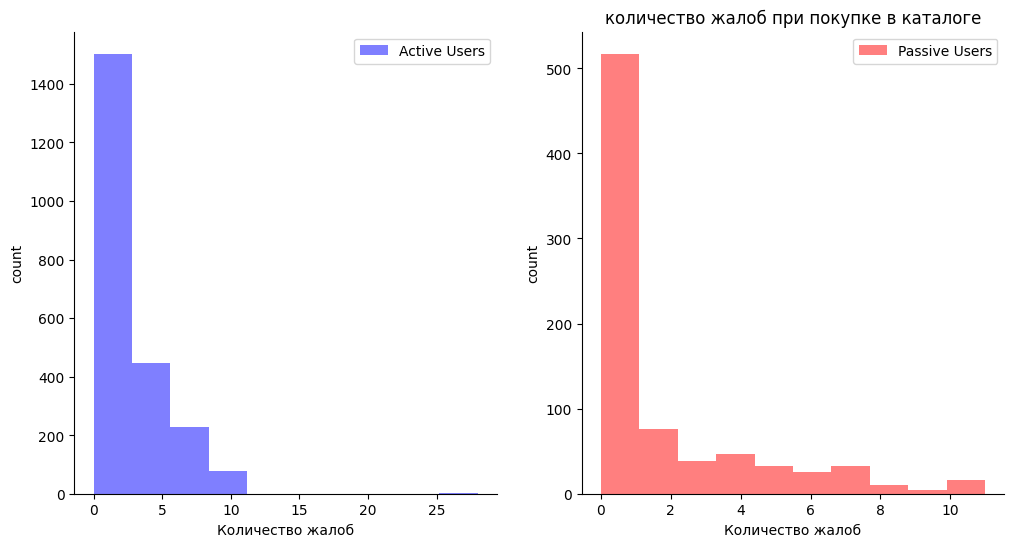

In [ ]:
# Создаем фигуру с 1 строкой и 2 столбцами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы для merged_active
merged_active.plot(kind='hist', x='complain_count', y='catalogue_purchases_count_avg', ax=ax1, color='blue', alpha=0.5, label='Active Users')
ax1.set_xlabel('Количество жалоб')
ax1.set_ylabel('count')
ax1.spines[['top', 'right']].set_visible(False)

# Построение гистограммы для merged_passive
merged_passive.plot(kind='hist', x='complain_count', y='catalogue_purchases_count_avg', ax=ax2, color='red', alpha=0.5, label='Passive Users')
ax2.set_xlabel('Количество жалоб')
ax2.set_ylabel('count')
ax2.spines[['top', 'right']].set_visible(False)

plt.title('количество жалоб при покупке в каталоге')
plt.show()

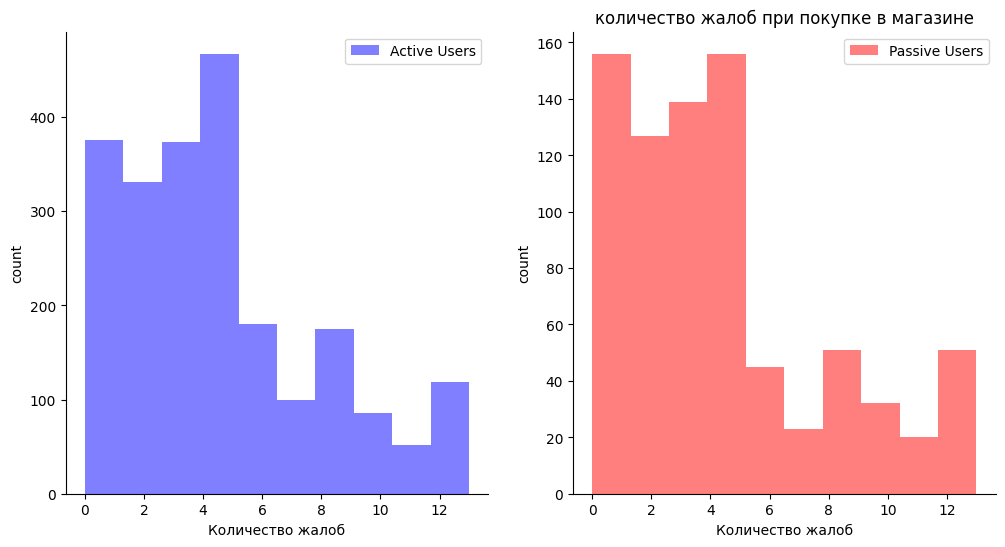

In [ ]:
# Создаем фигуру с 1 строкой и 2 столбцами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы для merged_active
merged_active.plot(kind='hist', x='complain_count', y='store_purchases_count_avg', ax=ax1, color='blue', alpha=0.5, label='Active Users')
ax1.set_xlabel('Количество жалоб')
ax1.set_ylabel('count')
ax1.spines[['top', 'right']].set_visible(False)

# Построение гистограммы для merged_passive
merged_passive.plot(kind='hist', x='complain_count', y='store_purchases_count_avg', ax=ax2, color='red', alpha=0.5, label='Passive Users')
ax2.set_xlabel('Количество жалоб')
ax2.set_ylabel('count')
ax2.spines[['top', 'right']].set_visible(False)

plt.title('количество жалоб при покупке в магазине')
plt.show()

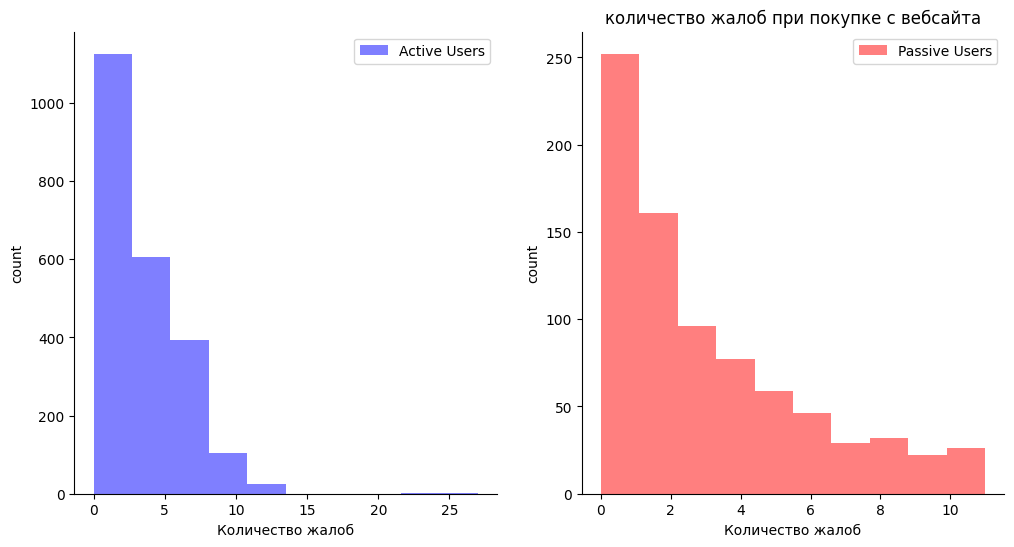

In [ ]:
# Создаем фигуру с 1 строкой и 2 столбцами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы для merged_active
merged_active.plot(kind='hist', x='complain_count', y='website_purchases_count_avg', ax=ax1, color='blue', alpha=0.5, label='Active Users')
ax1.set_xlabel('Количество жалоб')
ax1.set_ylabel('count')
ax1.spines[['top', 'right']].set_visible(False)

# Построение гистограммы для merged_passive
merged_passive.plot(kind='hist', x='complain_count', y='website_purchases_count_avg', ax=ax2, color='red', alpha=0.5, label='Passive Users')
ax2.set_xlabel('Количество жалоб')
ax2.set_ylabel('count')
ax2.spines[['top', 'right']].set_visible(False)

plt.title('количество жалоб при покупке с вебсайта')
plt.show()

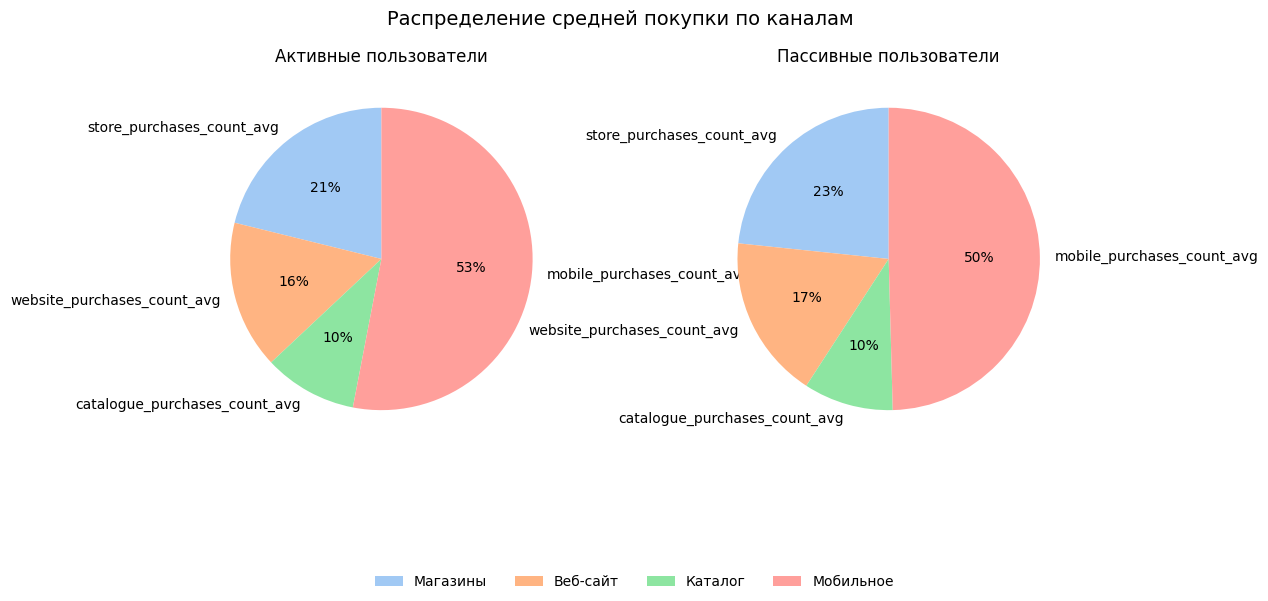

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Суммирование значений для каждого датафрейма
active_totals = merged_active[['store_purchases_count_avg', 'website_purchases_count_avg', 'catalogue_purchases_count_avg', 'mobile_purchases_count_avg']].sum()
passive_totals = merged_passive[['store_purchases_count_avg', 'website_purchases_count_avg', 'catalogue_purchases_count_avg', 'mobile_purchases_count_avg']].sum()

# Построение пайплота для merged_active
active_totals.plot(kind='pie',
                  ax=ax1,
                  colors=sns.color_palette('pastel'),
                  autopct='%1.0f%%',
                  startangle=90,
                  textprops={'fontsize': 10})
ax1.set_title('Активные пользователи')
ax1.set_ylabel('')

# Построение пайплота для merged_passive
passive_totals.plot(kind='pie',
                   ax=ax2,
                   colors=sns.color_palette('pastel'),
                   autopct='%1.0f%%',
                   startangle=90,
                   textprops={'fontsize': 10})
ax2.set_title('Пассивные пользователи')
ax2.set_ylabel('')

# Общий заголовок для фигуры
fig.suptitle('Распределение средней покупки по каналам', fontsize=14)

# Добавление общей легенды в нижнюю часть графика
fig.legend(labels=['Магазины', 'Веб-сайт', 'Каталог', 'Мобильное'], loc='lower center', ncol=4, frameon=False)

plt.subplots_adjust(bottom=0.25)

plt.show()

In [ ]:
active_order

,userid,category,avg_bill
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0
5,0ceeb59c-a91c-4cf4-8bf8-3593f12722b9,alcohol,602.0
6,b2a565e5-c3e2-4547-b075-d4ddedcc5506,alcohol,564.0
7,32fe3522-090a-4faa-b265-bc763142f0f5,meat,468.0
8,203e70de-1092-4cac-9234-9c68224a3185,sweets,55.0
...,...,...,...
23825,4f572bb9-7bf5-459a-8aa5-572d66e5adbc,alcohol,923.0
23829,7c6a5269-849b-449d-9659-d9bcdd2e3f42,fruits,0.0
23831,a6b826f4-a5b3-47b7-ad47-e7a3aee228df,vegetables,0.0
23833,74b3b32a-36a6-49c6-8ff0-3878fc2090ca,sweets,352.0


<ipython-input-209-a03a79aeea9e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=active_order, x='avg_bill', y='category', inner='box', palette='Dark2', ax=ax1)
<ipython-input-209-a03a79aeea9e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=passive_order, x='avg_bill', y='category', inner='box', palette='Dark2', ax=ax2)


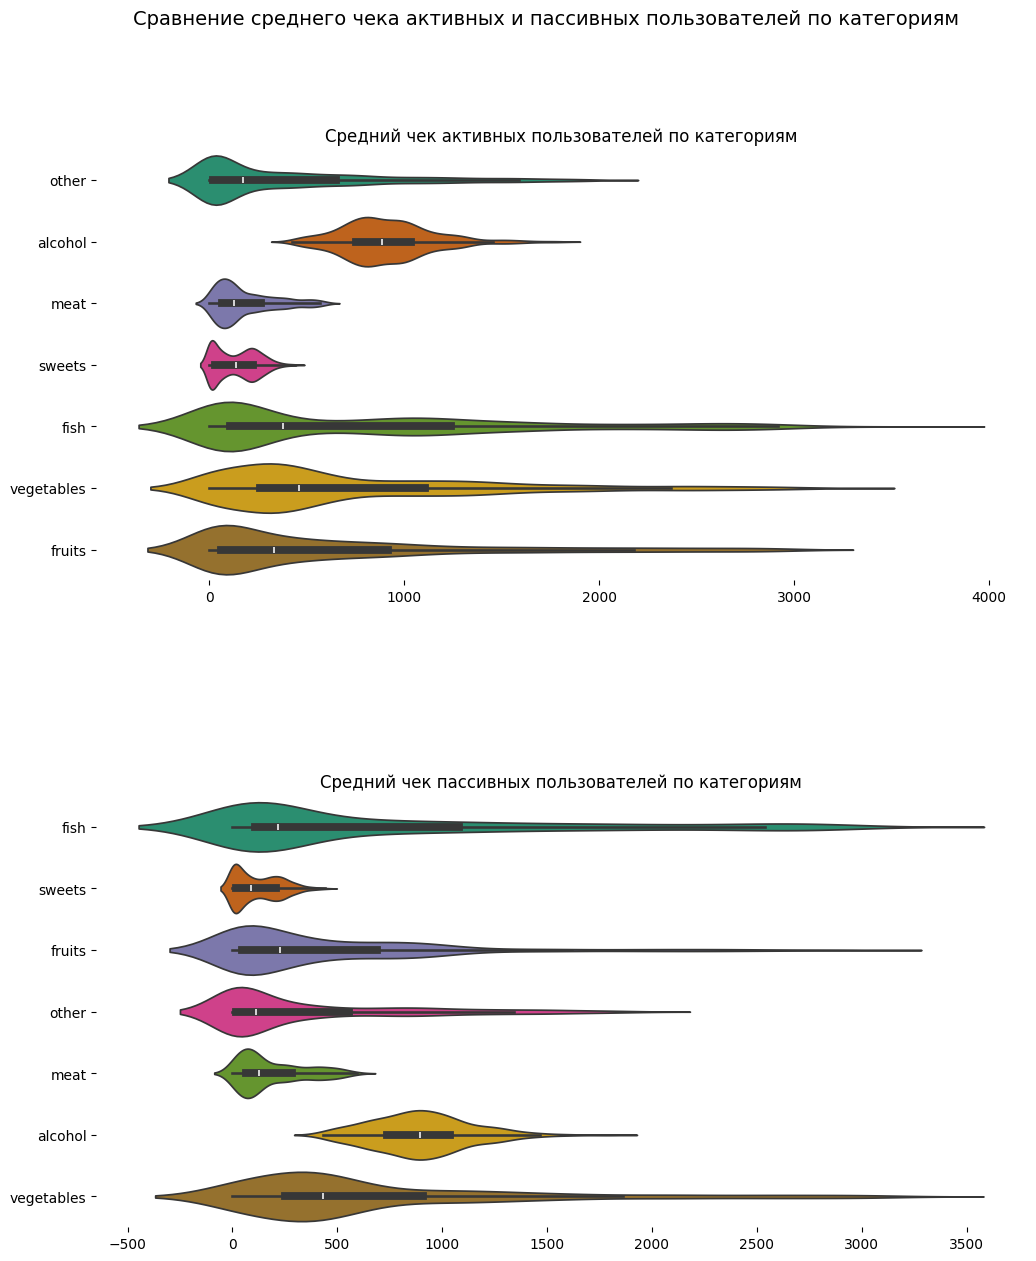

In [ ]:
# @title category vs avg_bill

active_categories = len(active_order['category'].unique())
passive_categories = len(passive_order['category'].unique())
figsize = (12, 2 * max(active_categories, passive_categories))

# Создаем фигуру с 2 строками и 1 столбцом
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

# Построение виолинного графика для активных пользователей
sns.violinplot(data=active_order, x='avg_bill', y='category', inner='box', palette='Dark2', ax=ax1)
ax1.set_title('Средний чек активных пользователей по категориям')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(top=True, right=True, bottom=True, left=True, ax=ax1)

# Построение виолинного графика для пассивных пользователей
sns.violinplot(data=passive_order, x='avg_bill', y='category', inner='box', palette='Dark2', ax=ax2)
ax2.set_title('Средний чек пассивных пользователей по категориям')
ax2.set_xlabel('')
ax2.set_ylabel('')
sns.despine(top=True, right=True, bottom=True, left=True, ax=ax2)

# Общий заголовок для фигуры
fig.suptitle('Сравнение среднего чека активных и пассивных пользователей по категориям', fontsize=14)

plt.subplots_adjust(hspace=0.5)
plt.show()

видим, что по всяким парметрам группы, которые мы выделили, почти не отличаются. Поэтому особо разницы между теми, кто покупал месяц назад и два месяца назад нет. Давайте посмотрим на количество регистрирующихся пользователей по дням

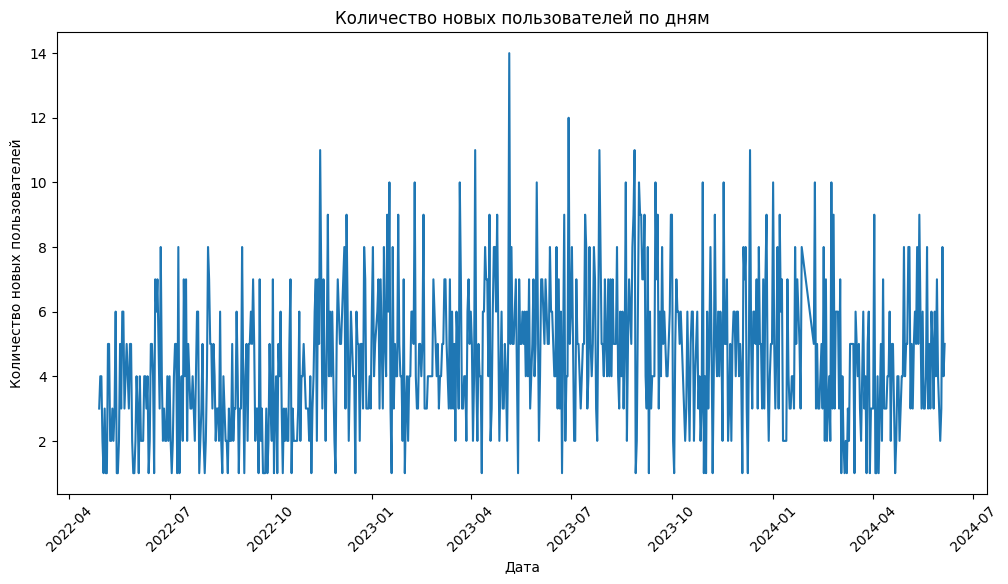

In [ ]:
# Загрузите ваш датасет
df = user

# Сгруппируйте данные по дате регистрации и посчитайте количество пользователей
daily_registrations = df.groupby(df['join_datetime'].dt.date).size().reset_index(name='count')

# Отсортируйте данные по дате регистрации
daily_registrations = daily_registrations.sort_values('join_datetime')

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(x='join_datetime', y='count', data=daily_registrations)
plt.title('Количество новых пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество новых пользователей')
plt.xticks(rotation=45)
plt.show()

видим просадку около июня, рассмотрим поближе этот месяц

In [ ]:
user.head(10)

,userid,join_datetime,age,income,kids,teenagers,marital,education
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters
2,d4810416-7e2a-4d1b-8440-30f39cd42aca,2022-11-14 12:31:05,13,25508.0,0,0,single,NaN
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters
5,607a82ac-14b3-45db-85c1-e0d668b1793a,2024-05-13 20:35:20,58,70183.0,0,0,single,masters
6,8a1e5952-c903-4b0c-a014-6f8d343ff101,2024-01-25 04:54:21,22,79870.0,0,0,single,bachelor
7,1cda23eb-4778-401c-a914-d0bdbba0013c,2023-05-18 11:35:35,17,25966.0,0,0,single,NaN
8,985a4133-a3b9-48e8-8989-a2c5906539be,2024-01-14 12:42:46,44,95755.0,0,1,married,phd
9,14c50c40-d3d5-40e4-9f62-a190b7a50df3,2022-10-10 21:48:39,63,51091.0,1,1,dating,bachelor


<ipython-input-212-530b645ac9a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['join_datetime'] = pd.to_datetime(df['join_datetime'])
<ipython-input-212-530b645ac9a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['join_date'] = df['join_datetime'].dt.date


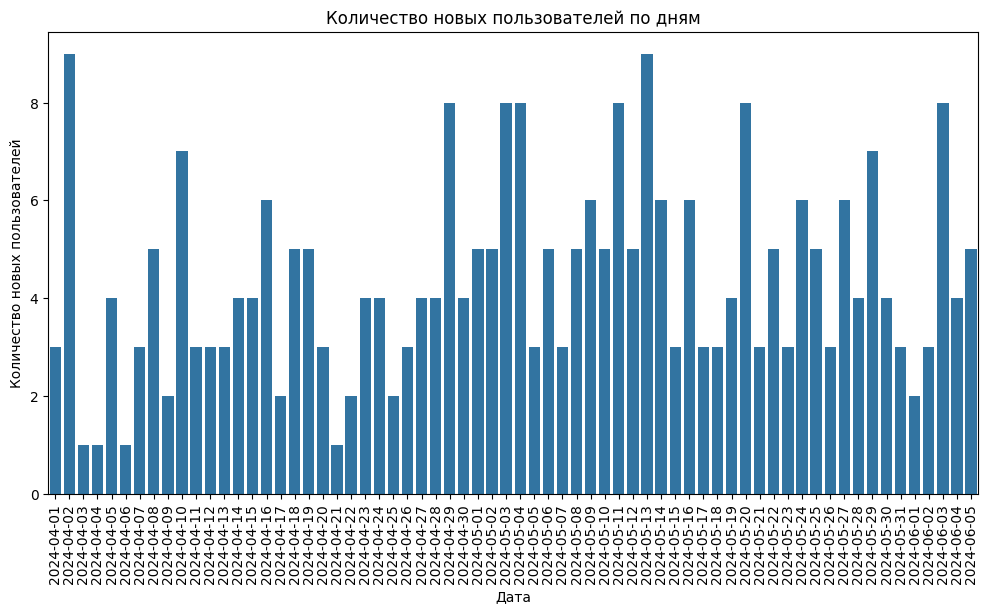

In [ ]:
df = user.loc[(user['join_datetime'] >= pd.to_datetime('01-04-2024', format='%d-%m-%Y')) & (user['join_datetime'] < pd.to_datetime('01-09-2024', format='%d-%m-%Y'))]

# Преобразуйте столбец join_datetime в формат datetime
df['join_datetime'] = pd.to_datetime(df['join_datetime'])

# Округлите дату до дня
df['join_date'] = df['join_datetime'].dt.date

# Сгруппируйте данные по дате регистрации и посчитайте количество пользователей
daily_registrations = df.groupby('join_date').size().reset_index(name='count')

# Отсортируйте данные по дате регистрации
daily_registrations = daily_registrations.sort_values('join_date')

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x='join_date', y='count', data=daily_registrations)
plt.title('Количество новых пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество новых пользователей')
plt.xticks(rotation=90)
plt.show()

<ipython-input-213-4c9d3cde0abc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['join_datetime'] = pd.to_datetime(df['join_datetime'])
<ipython-input-213-4c9d3cde0abc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['join_date'] = df['join_datetime'].dt.date


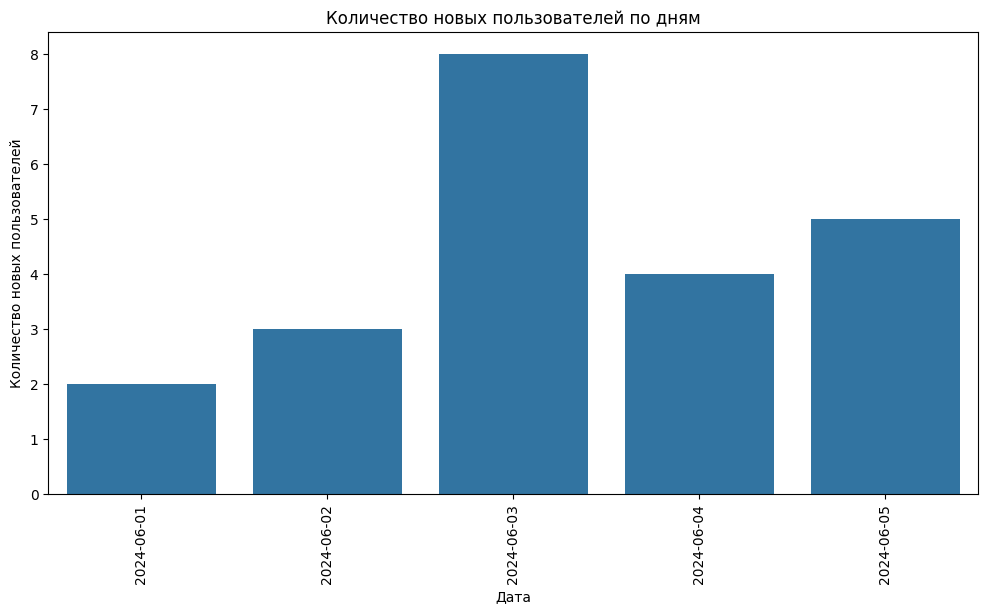

In [ ]:
df = user.loc[(user['join_datetime'] >= pd.to_datetime('01-06-2024', format='%d-%m-%Y')) & (user['join_datetime'] < pd.to_datetime('01-07-2024', format='%d-%m-%Y'))]

# Преобразуйте столбец join_datetime в формат datetime
df['join_datetime'] = pd.to_datetime(df['join_datetime'])

# Округлите дату до дня
df['join_date'] = df['join_datetime'].dt.date

# Сгруппируйте данные по дате регистрации и посчитайте количество пользователей
daily_registrations = df.groupby('join_date').size().reset_index(name='count')

# Отсортируйте данные по дате регистрации
daily_registrations = daily_registrations.sort_values('join_date')

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x='join_date', y='count', data=daily_registrations)
plt.title('Количество новых пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество новых пользователей')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['join_date'].unique()

array([datetime.date(2024, 6, 3), datetime.date(2024, 6, 5),
       datetime.date(2024, 6, 4), datetime.date(2024, 6, 1),
       datetime.date(2024, 6, 2)], dtype=object)

видим, что после июня вообще никто не регистрировался, нужно понять почему так произошло. Либо это связано с чем-то бизнесовым, но скорее всего так из-за того, что информация собиралась на момент 5 июня



In [ ]:
# посмотрим на количество жалоб по каналам заказов


In [ ]:
clear_inter['complain_count'].sum()

1773

посмотрим что дали рекламные кампании

In [ ]:
# разделим тех, кто отреагировал на рекламную кампанию
first = clear_inter.loc[clear_inter['marketing_company_outcome_1'] != 0, 'userid'].to_list()
second = clear_inter.loc[clear_inter['marketing_company_outcome_2'] != 0, 'userid'].to_list()
fird = clear_inter.loc[clear_inter['marketing_company_outcome_3'] != 0, 'userid'].to_list()
fouth = clear_inter.loc[clear_inter['marketing_company_outcome_4'] != 0, 'userid'].to_list()
fifth = clear_inter.loc[clear_inter['marketing_company_outcome_5'] != 0, 'userid'].to_list()


In [ ]:
# посмотрим теперь средний чек тех, кто откликнулся в каждой кампании

def check(users_id):
  need = clear_order.loc[clear_order['userid'].isin(users_id)]
  print('сумма средних чеков', need['avg_bill'].sum())
  print('среднее средних чеков', need['avg_bill'].mean())


mas = [first, second, fird, fouth, fifth]

for i in range(5):
  print(f'кампания номер {i + 1}')
  check(mas[i])
  print()

кампания номер 1
сумма средних чеков 2088032.0
среднее средних чеков 529.9573604060914

кампания номер 2
сумма средних чеков 1409953.0
среднее средних чеков 410.46666666666664

кампания номер 3
сумма средних чеков 1960489.0
среднее средних чеков 457.20359141791045

кампания номер 4
сумма средних чеков 1890970.0
среднее средних чеков 477.7589691763517

кампания номер 5
сумма средних чеков 2278658.0
среднее средних чеков 550.1347175277643



топ кампаний по прибыльности:
5
1
4
3
2

как будто 1 кампания выброс, а потом фирма учитывала ошибки каждой предыдущей кампании и улучшала их и каждая новая приносила больше прибыли

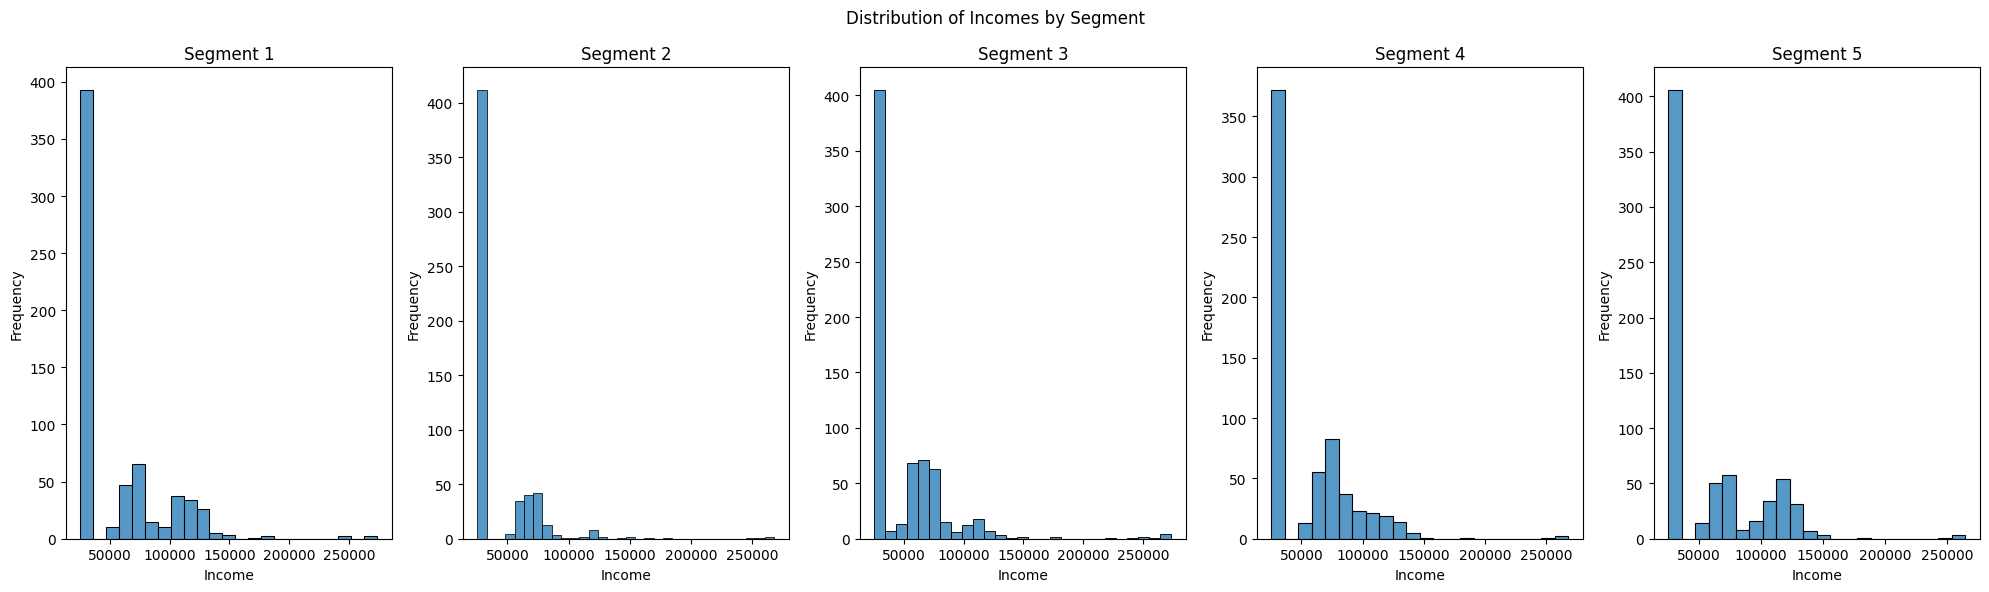

In [ ]:
# посмотрим на зарплаты людей в каждой кампании

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
mas = [first, second, fird, fouth, fifth]
df = user.copy()

for i, users_id in enumerate(mas):
    userss = df.loc[df['userid'].isin(users_id)]
    sns.histplot(userss['income'], ax=axes[i])
    axes[i].set_title(f'Segment {i+1}')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Incomes by Segment')
plt.tight_layout()
plt.show()

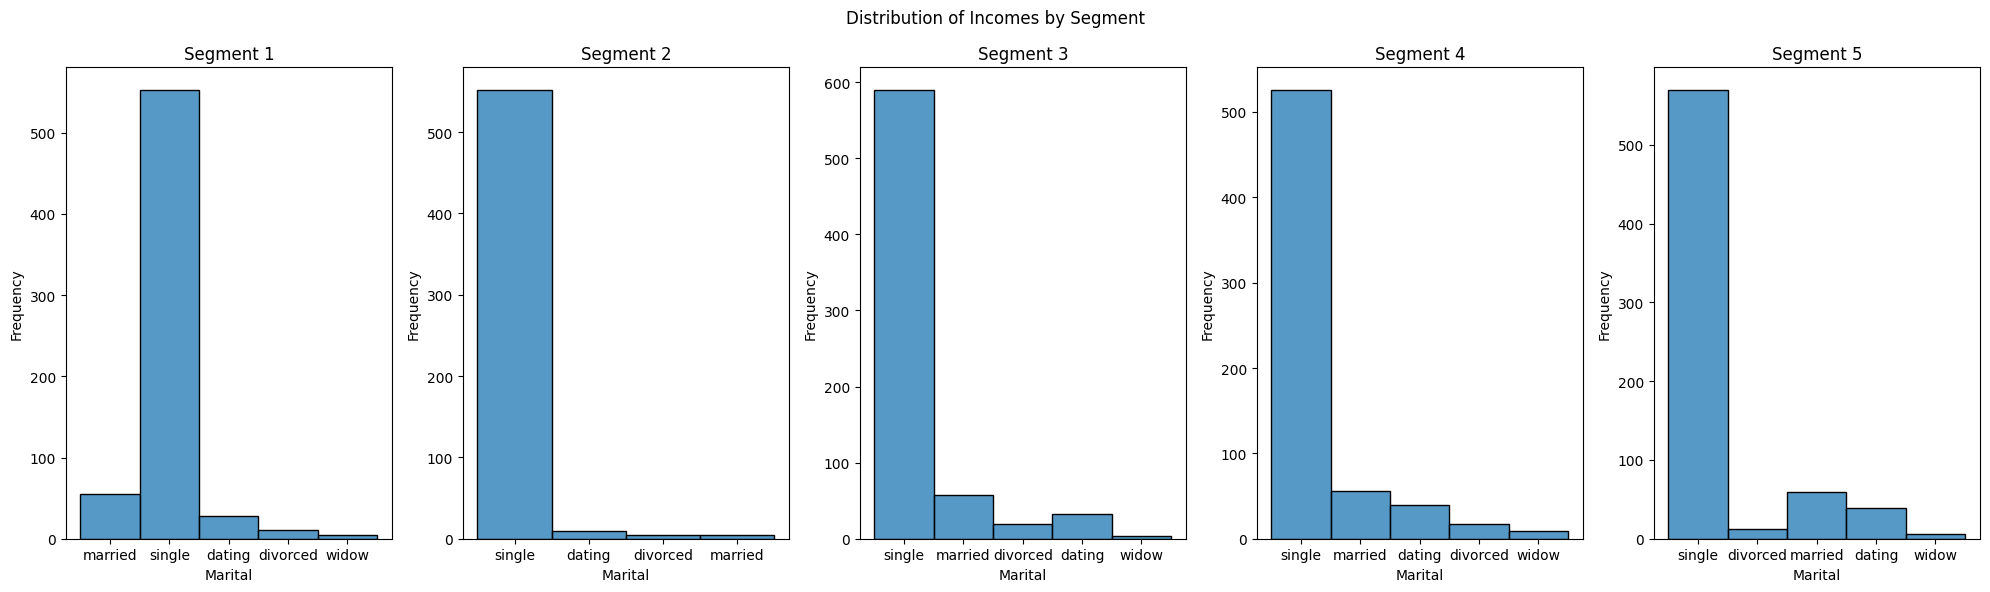

In [ ]:
# распределение семейных положений в каждой кампании
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
mas = [first, second, fird, fouth, fifth]
df = user.copy()

for i, users_id in enumerate(mas):
    userss = df.loc[df['userid'].isin(users_id)]
    sns.histplot(userss['marital'], ax=axes[i])
    axes[i].set_title(f'Segment {i+1}')
    axes[i].set_xlabel('Marital')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Incomes by Segment')
plt.tight_layout()
plt.show()


болшая часть кто откликался на рекламу - одинокие люди, скорее всего, это из-за того что их впринципе большинство. однако можно заметить, что чем больше людей в браке задействовано, тем больше кампания приносит доход

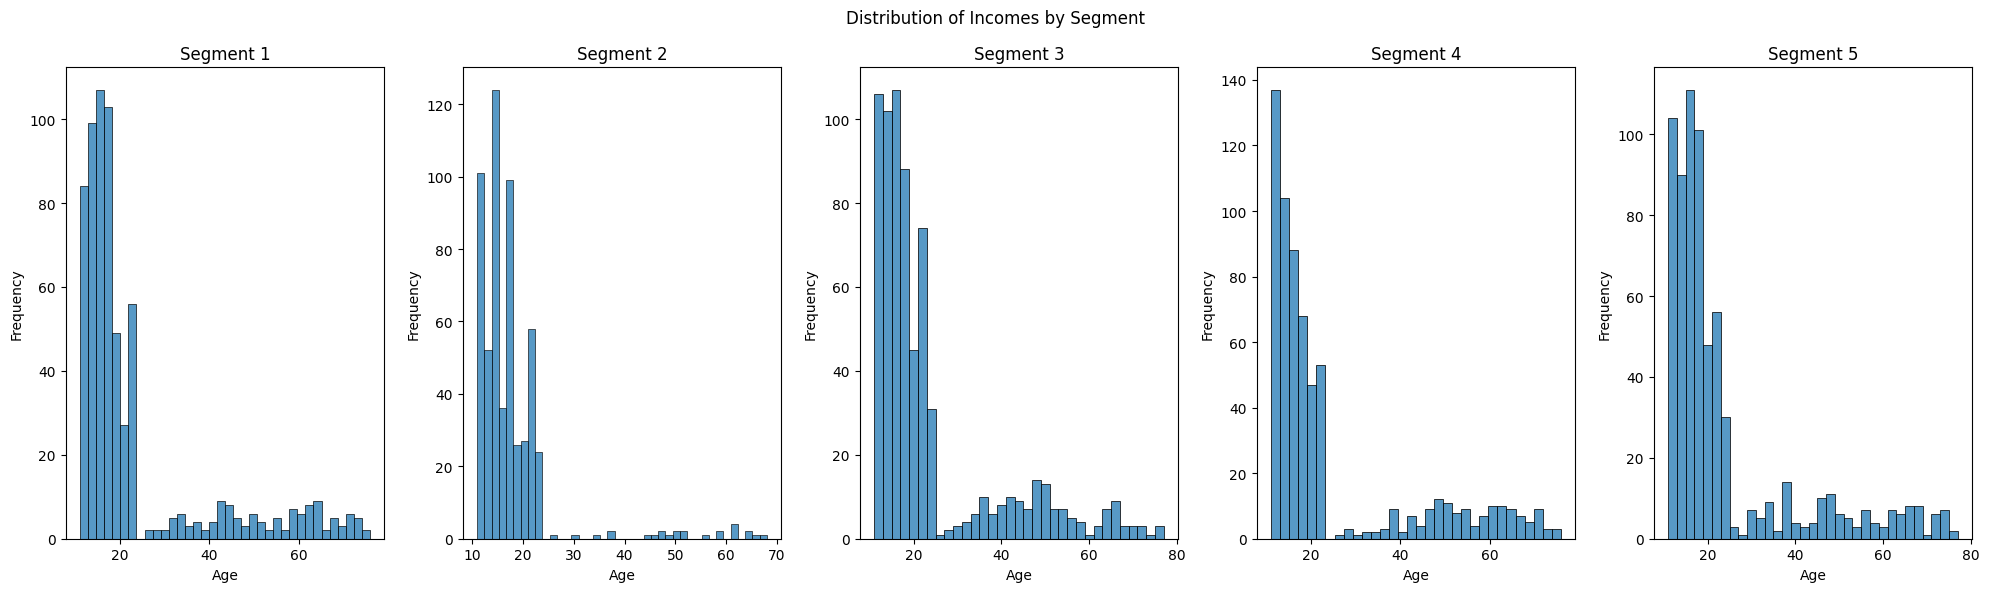

In [ ]:
# распределение возрастов в каждой кампании

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
mas = [first, second, fird, fouth, fifth]
df = user.copy()

for i, users_id in enumerate(mas):
    userss = df.loc[df['userid'].isin(users_id)]
    sns.histplot(userss['age'], ax=axes[i])
    axes[i].set_title(f'Segment {i+1}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Incomes by Segment')
plt.tight_layout()
plt.show()

In [ ]:
user.head()

,userid,join_datetime,age,income,kids,teenagers,marital,education
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters
2,d4810416-7e2a-4d1b-8440-30f39cd42aca,2022-11-14 12:31:05,13,25508.0,0,0,single,NaN
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters


# ГИПОТЕЗА

наши рекламные кампании привлекают преимущественно молодых людей. Исходя из медианных зарплат людей разного возраста мы предполагаем, что средний чек у молодых людей ,в среднем, меньше, чем у пожилых

Н0: средний чек молодых пользователей не отличается от среднего чека остальных пользователей
Н1: средний чек молодых пользователей отличается от среднего чека остальных пользователей



Для каждой рекламной кампании проведем статистический тест, сравнив среднее средних чеков для молодых пользвателей и для остальных, уровень значимости 95%

In [ ]:
from scipy import stats


def test(group1, group2):
  if stats.shapiro(group1)[1] >= 0.05 and stats.shapiro(group2)[1] >= 0.05:  # если данные распределены нормально, то Стьюдент
        value = stats.ttest_ind(group1, group2, equal_var=False, alternative='two-sided')[1]
        print('Стьюдент')
  else:  # иначе Манн-Уитней
      value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
      print('Манн-Уитней')
  return value


mas = [first, second, fird, fouth, fifth]
df = user.copy()

for i in range(5):
  users_id = mas[i]
  u = df.loc[df['userid'].isin(users_id)]
  yang = u.loc[u['age'] <= 25, 'userid'].to_list()
  old = u.loc[u['age'] > 25, 'userid'].to_list()

  g1 = clear_order.loc[clear_order['userid'].isin(yang), 'avg_bill'].to_list()
  g2 = clear_order.loc[clear_order['userid'].isin(old), 'avg_bill'].to_list()

  print(f'кампания номер {i + 1}')
  print('средний средний чек молодых', pd.Series(g1).mean())
  print('средний средний чек старых', pd.Series(g2).mean())
  print(test(g1, g2))
  print()



кампания номер 1
средний средний чек молодых 395.25596184419715
средний средний чек старых 1062.8327044025157
Манн-Уитней
MannwhitneyuResult(statistic=600646.0, pvalue=9.152436711282195e-114)

кампания номер 2
средний средний чек молодых 389.120036652413
средний средний чек старых 844.5590062111801
Манн-Уитней
MannwhitneyuResult(statistic=179267.5, pvalue=6.77890440642019e-12)

кампания номер 3
средний средний чек молодых 415.18499548056644
средний средний чек старых 601.124871001032
Манн-Уитней
MannwhitneyuResult(statistic=1429938.0, pvalue=1.4832733335200092e-07)

кампания номер 4
средний средний чек молодых 389.96806722689075
средний средний чек старых 743.4537131230926
Манн-Уитней
MannwhitneyuResult(statistic=1061490.5, pvalue=4.240497034964688e-38)

кампания номер 5
средний средний чек молодых 397.2391237272447
средний средний чек старых 1100.1176470588234
Манн-Уитней
MannwhitneyuResult(statistic=607326.5, pvalue=6.507538118449751e-159)



по всем рекламным кампаниям есть статзначимость, поэтому нулевая гипотеза отвергается.
А значит средний чек у молодых людей, в среднем, меньше, чем у пожилых. Поэтому, если привлекать больше пожилых людей, то и прибыль будет выше. А значит действительно нужно менять рекламную кампанию так, чтобы она
привлекала более возрастных клиентов


In [ ]:
mas = [first, second, fird, fouth, fifth]
df = user.copy()
all_yang = len(df.loc[df['age'] <= 25, 'userid'])
all_old = len(df.loc[df['age'] > 25, 'userid'])

print('СКОЛЬКО ПРИВЛЕКЛА КАЖДАЯ РЕКЛАМНАЯ КАМПАНИЯ')
print()

for i in range(5):
  users_id = mas[i]
  u = df.loc[df['userid'].isin(users_id)]
  yang = len(u.loc[u['age'] <= 25, 'userid'])
  old = len(u.loc[u['age'] > 25, 'userid'])

  print(f'кампания номер {i + 1}')
  print('конверсия молодых', round(yang / all_yang, 2))
  print('конверсия старых', round(old / all_old, 2))
  print()

СКОЛЬКО ПРИВЛЕКЛА КАЖДАЯ РЕКЛАМНАЯ КАМПАНИЯ

кампания номер 1
конверсия молодых 0.43
конверсия старых 0.06

кампания номер 2
конверсия молодых 0.45
конверсия старых 0.01

кампания номер 3
конверсия молодых 0.46
конверсия старых 0.07

кампания номер 4
конверсия молодых 0.41
конверсия старых 0.07

кампания номер 5
конверсия молодых 0.45
конверсия старых 0.07

